## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [12]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from model import PlacementProcedure, generateInputs
from model import generateInputs, BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [13]:
inputs = {'v': [(188, 28, 58),
  (188, 28, 58),
  (188, 28, 58),
  (188, 28, 58),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (260, 39, 80),
  (260, 39, 80),
  (145, 80, 96),
  (145, 80, 96)],
 'V': [(589, 235, 239), (1208, 235, 239)]}
print('number of boxes:',len(inputs['v']))


number of boxes: 10


In [14]:
start_time = time.time()

model = BRKGA(inputs, num_generations = 35, num_individuals=70, num_elites = 10, num_mutants = 7, eliteCProb = 0.7)
model.fit(patient = 15,verbose = True)
print(model)
print('used bins:',model.used_bins)
print('time:',time.time() - start_time)


Initial Population:
  ->  shape: (70, 20)
  ->  Best Fitness: 1.0679934228474584
Generation : 0  	(Best Fitness: 1.0679934228474584 )
Generation : 1  	(Best Fitness: 1.0679934228474584 )
Generation : 2  	(Best Fitness: 1.0679934228474584 )
Generation : 3  	(Best Fitness: 1.0679934228474584 )
Generation : 4  	(Best Fitness: 1.0679934228474584 )
Generation : 5  	(Best Fitness: 1.0679934228474584 )
Generation : 6  	(Best Fitness: 1.0679934228474584 )
Generation : 7  	(Best Fitness: 1.0679934228474584 )
Generation : 8  	(Best Fitness: 1.0679934228474584 )
Generation : 9  	(Best Fitness: 1.0679934228474584 )
Generation : 10  	(Best Fitness: 1.0679934228474584 )
Generation : 11  	(Best Fitness: 1.0679934228474584 )
Generation : 12  	(Best Fitness: 1.0679934228474584 )
Generation : 13  	(Best Fitness: 1.0679934228474584 )
Generation : 14  	(Best Fitness: 1.0679934228474584 )
Generation : 15  	(Best Fitness: 1.0679934228474584 )
Early stop at iter 16 (timeout)
used bins: 1
time: 10.9333300590

In [15]:
inputs['solution'] = model.solution
decoder = PlacementProcedure(inputs, model.solution, True)
print('fitness:',decoder.evaluate())

------------------------------------------------------------------
|   Placement Procedure
|    -> Boxes: [(188, 28, 58), (188, 28, 58), (188, 28, 58), (188, 28, 58), (61, 9, 79), (61, 9, 79), (61, 9, 79), (61, 9, 79), (61, 9, 79), (260, 39, 80)]
|    -> Box Packing Sequence: [1 3 9 4 8 5 6 0 2 7]
|    -> Vector of Box Orientations: [0.52748794 0.4409939  0.74130609 0.29120903 0.34488144 0.23419595
 0.89777341 0.53029664 0.7525905  0.18130557]
-------------------------------------------------------------------
Select Box: (188, 28, 58)
Select EMS: [(np.int64(0), np.int64(0), np.int64(0)), (np.int64(589), np.int64(235), np.int64(239))]
Select VBO: 4   (BOs [1, 2, 3, 4, 5, 6] , vector 0.5274879434238787 )
Add box to Bin 0
 -> EMSs: [[(np.int64(28), np.int64(0), np.int64(0)), (np.int64(589), np.int64(235), np.int64(239))], [(np.int64(0), np.int64(58), np.int64(0)), (np.int64(589), np.int64(235), np.int64(239))], [(np.int64(0), np.int64(0), np.int64(188)), (np.int64(589), np.int64(235), np

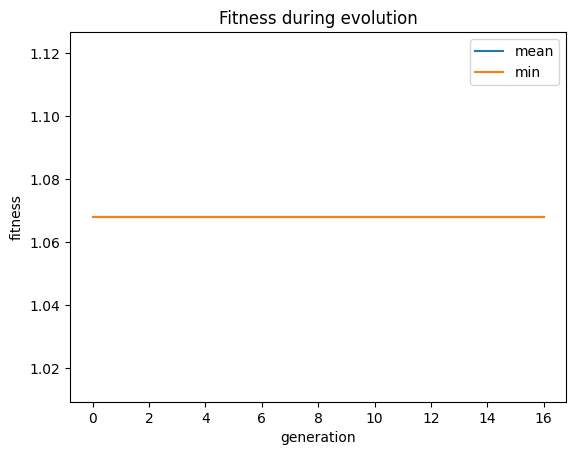

In [16]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-')
    plt.show()

plot_history(model.history)


/home/jaydatt/Desktop/work/container-packing/3D-Bin-Packing-Problem-with-BRKGA/code/plot.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.boxes_df = pd.concat([self.boxes_df ,pd.DataFrame({'box':self.boxes_num, 'sides': sides,


Container 0 :
Box 0 overlapped with box 1.
Box 0 overlapped with box 2.
Box 0 overlapped with box 3.
Box 0 overlapped with box 5.
Box 0 overlapped with box 6.
Box 0 overlapped with box 8.
Box 0 overlapped with box 9.
Box 1 overlapped with box 2.
Box 1 overlapped with box 3.
Box 1 overlapped with box 5.
Box 1 overlapped with box 6.
Box 1 overlapped with box 8.
Box 1 overlapped with box 9.
Box 2 overlapped with box 3.
Box 2 overlapped with box 4.
Box 2 overlapped with box 5.
Box 2 overlapped with box 6.
Box 2 overlapped with box 7.
Box 2 overlapped with box 8.
Box 2 overlapped with box 9.
Box 3 overlapped with box 4.
Box 3 overlapped with box 5.
Box 3 overlapped with box 6.
Box 3 overlapped with box 7.
Box 3 overlapped with box 8.
Box 3 overlapped with box 9.
Box 4 overlapped with box 6.
Box 4 overlapped with box 9.
Box 5 overlapped with box 6.
Box 5 overlapped with box 8.
Box 5 overlapped with box 9.
Box 6 overlapped with box 7.
Box 6 overlapped with box 8.
Box 6 overlapped with box 9.


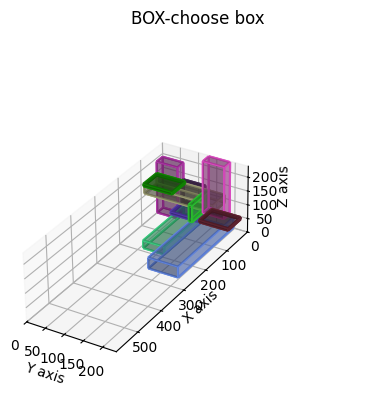

In [17]:
from plot import plot_3D

def draw(decoder):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=inputs['V'][0])
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container', i, ':')
        container.findOverlapping()
        container.show()

draw(decoder)